In [133]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [135]:
df = pd.read_csv('/content/gdrive/MyDrive/DMW/datasets/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [137]:
df['final_score'] = df.apply(lambda x: (x['math score'] + x['reading score'] + x['writing score'])/3, axis=1)

In [138]:
df2 = df
df2 = df2.drop(['math score','reading score','writing score'],axis=1)

In [139]:
df2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,final_score
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333


In [140]:
df2 = pd.get_dummies(df2, columns=['gender','lunch','parental level of education','race/ethnicity','test preparation course'])

In [146]:
df2.head()

,final_score,gender_female,gender_male,lunch_free/reduced,lunch_standard,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,test preparation course_completed,test preparation course_none
0,72.666667,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1
1,82.333333,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
2,92.666667,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
3,49.333333,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,76.333333,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1


In [142]:
# multi-variate
y = df2['final_score']
X = df2.drop(['final_score'],axis=1)

xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.25,random_state=10)

<Axes: >

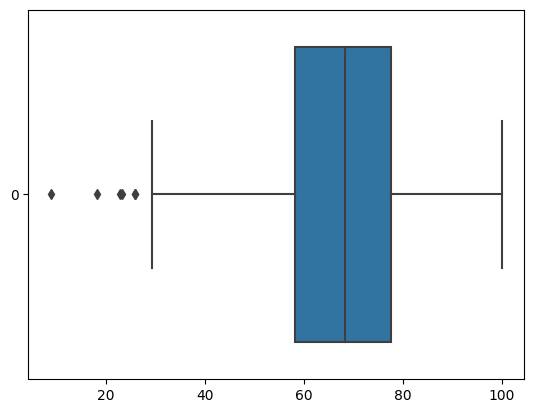

In [143]:
sns.boxplot(data=df2['final_score'],orient='h')

In [144]:
model = LinearRegression()
model.fit(xtrain,ytrain)
score = model.score(xtest,ytest)
print(score)
ypred = model.predict(xtest)

0.19674412629893356


0.944431815987387


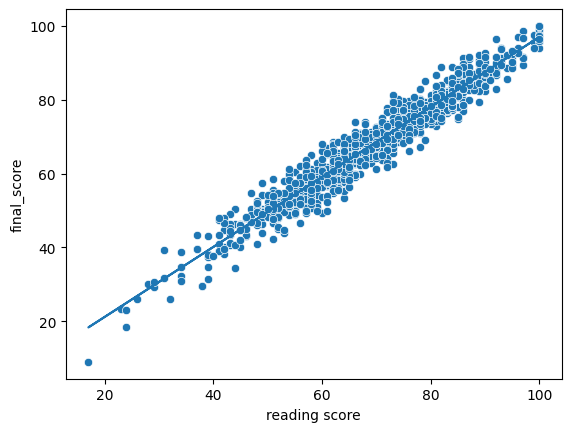

In [145]:
# univariate
sns.scatterplot(data=df,x=df['reading score'],y=df['final_score'])

#regression line
m,b = np.polyfit(x=df['reading score'],y=df['final_score'],deg=1)
X = df['reading score']
plt.plot(X, m*X+b)

X_uni = df['reading score']
y_uni = df['final_score']

x_uni_train, x_uni_test, y_uni_train, y_uni_test = train_test_split(X_uni,y_uni,test_size=0.25,random_state=10)

x_uni_train = x_uni_train.values.reshape(-1,1)
x_uni_test = x_uni_test.values.reshape(-1,1)

uni_model = LinearRegression()
uni_model.fit(x_uni_train,y_uni_train)
uni_score = uni_model.score(x_uni_test,y_uni_test)
print(uni_score)
y_uni_pred = uni_model.predict(x_uni_test)